In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# 1. Load Dataset
df = pd.read_csv("Netflix Dataset 1.csv")
print("Dataset Loaded Successfully!\n")
print("Shape of Dataset:", df.shape)
print("\nColumns in Dataset:\n", df.columns)

Dataset Loaded Successfully!

Shape of Dataset: (7789, 11)

Columns in Dataset:
 Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


In [4]:
print("\nDataset Information:\n")
print(df.info())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


In [5]:
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


Missing Values in Each Column:

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [6]:
print("\nDuplicate Records:", df.duplicated().sum())


Duplicate Records: 2


In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
print("\nDuplicate Records:", df.duplicated().sum())


Duplicate Records: 0


In [10]:
# Fill missing values if needed (replace NaN with 'Unknown')
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Release_Date'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True)
df['Duration'].fillna('Unknown', inplace=True)

C:\Users\SAURABH SINGH\AppData\Local\Temp\ipykernel_2860\2906880117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
C:\Users\SAURABH SINGH\AppData\Local\Temp\ipykernel_2860\2906880117.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [11]:
# Extract Year from date_added
df['year_added'] = df['Release_Date'].str.extract(r'(\d{4})')
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')

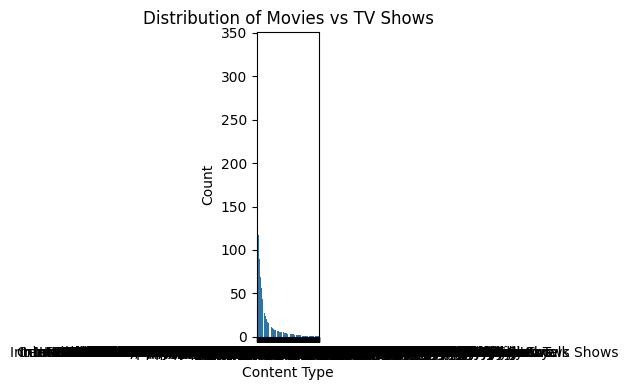

In [14]:
# ---- Count of Movies vs TV Shows ----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\SAURABH SINGH\AppData\Local\Temp\ipykernel_2860\2167808865.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\SAURABH SINGH\AppData\Local\Temp\ipykernel_2860\2167808865.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


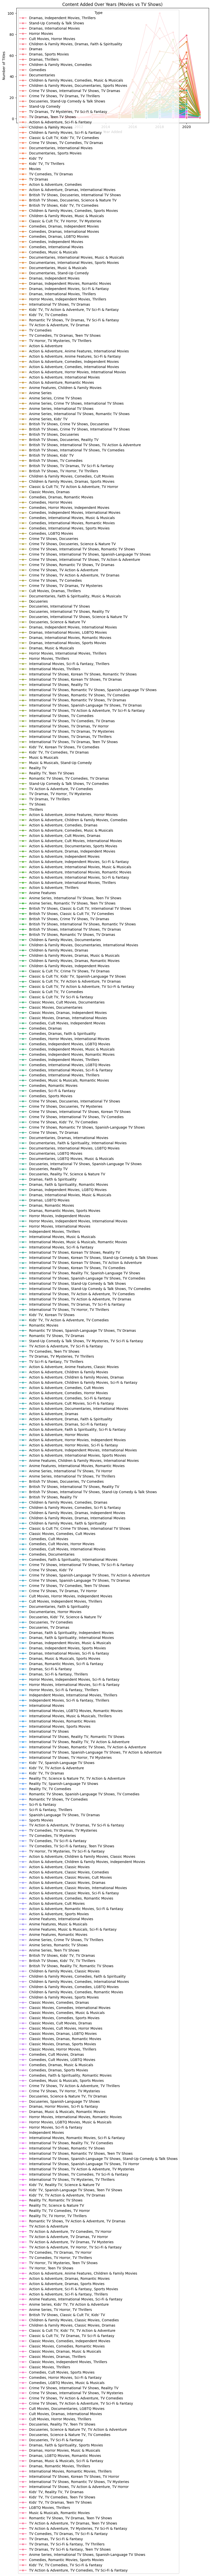

In [16]:
 #---- Trend of Content Added Over the Years ----
content_trend = df.groupby(['year_added', 'Type']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.lineplot(data=content_trend, x='year_added', y='count', hue='Type', marker='o')
plt.title("Content Added Over Years (Movies vs TV Shows)")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


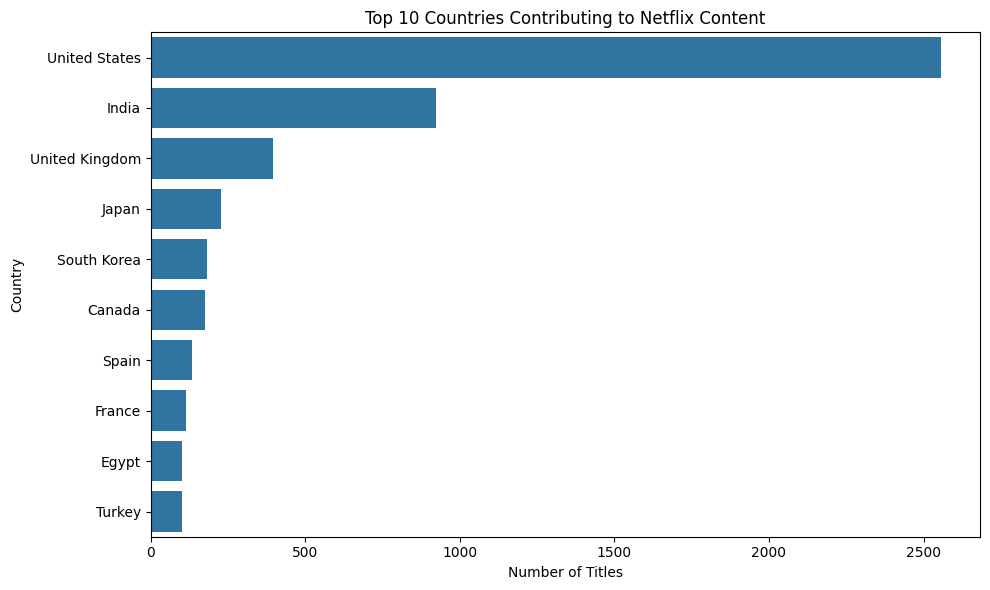

In [18]:
# ---- Top 10 Countries with Most Titles ----
country_data = df[df['Country'] != 'Unknown']
country_counts = country_data['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

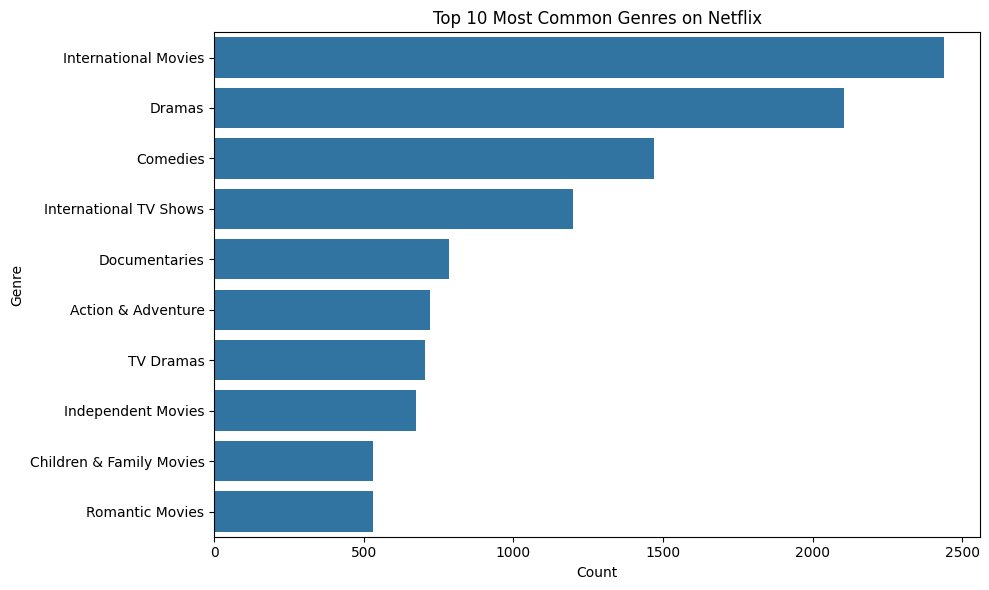

In [21]:
# ---- Genre Analysis ----
genre_split = df['Type'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
genre_split = genre_split.str.strip()
genre_counts = genre_split.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


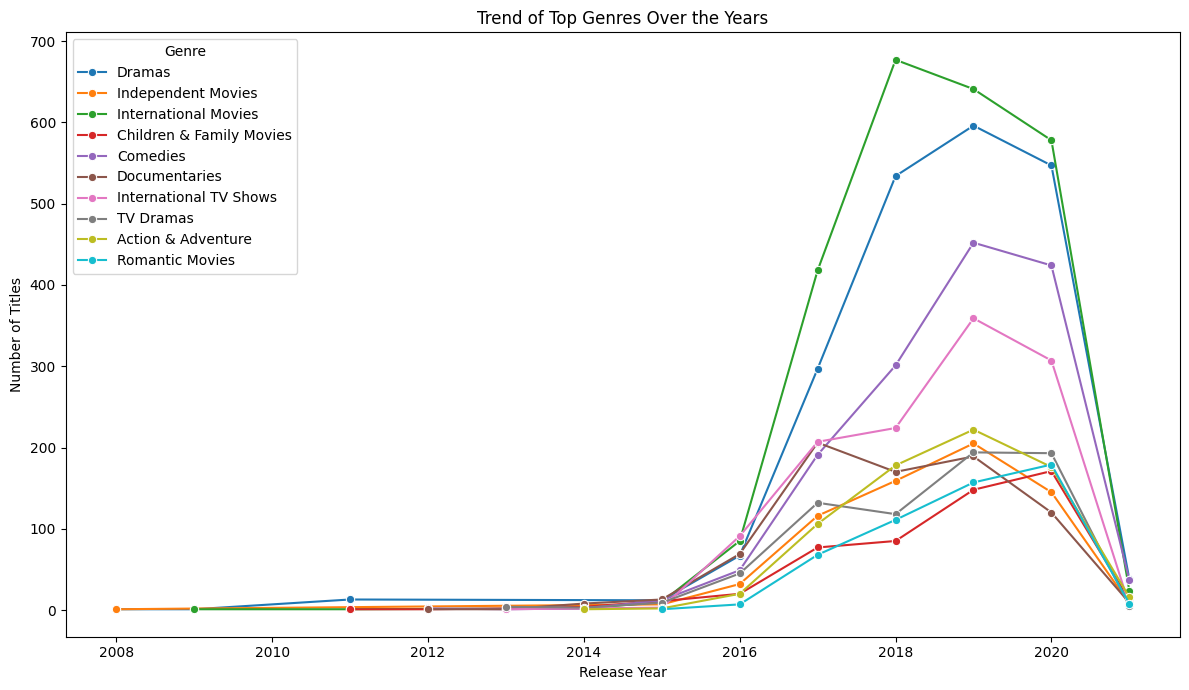

In [28]:
# ---- Yearly Genre Trend (Adjusted for Your Dataset) ----

# Extract Year from Release_Date


# Select relevant columns (year and type)
df_genre = df[['year_added', 'Type']].dropna()
df_genre = df_genre[df_genre['year_added'].notnull()]

# Split multiple genres separated by commas
df_genre['Type'] = df_genre['Type'].str.split(',')
df_genre = df_genre.explode('Type')
df_genre['Type'] = df_genre['Type'].str.strip()

# Group by year and genre
genre_year = df_genre.groupby(['year_added', 'Type']).size().reset_index(name='count')

# Get top genres from earlier genre count
top_genres = genre_counts.index.tolist()
genre_year = genre_year[genre_year['Type'].isin(top_genres)]

# Plot the trend
plt.figure(figsize=(12,7))
sns.lineplot(data=genre_year, x='year_added', y='count', hue='Type', marker='o')
plt.title("Trend of Top Genres Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.tight_layout()
plt.show()


In [30]:
# 5. Key Insights (Printed Summary)
# ------------------------------------------------------------
print("\n========== KEY INSIGHTS ==========")
print(f"Total Titles: {len(df)}")
print(f"Movies: {len(df[df['Type']=='Movie'])}")
print(f"TV Shows: {len(df[df['Type']=='TV Show'])}")
print("\nTop 5 Genres:")
print(genre_counts.head())
print("\nTop 5 Countries:")
print(country_counts.head())


========== KEY INSIGHTS ==========
Total Titles: 7787
Movies: 0
TV Shows: 0

Top 5 Genres:
International Movies      2437
Dramas                    2106
Comedies                  1471
International TV Shows    1199
Documentaries              786
Name: count, dtype: int64

Top 5 Countries:
Country
United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: count, dtype: int64


In [31]:
# 6. Strategic Recommendations (Text Output)
# ------------------------------------------------------------
print("\n========== STRATEGIC RECOMMENDATIONS ==========")
print("1. Netflix should continue focusing on Movie content, which dominates the catalog.")
print("2. The USA and India are key contributors — future collaborations can enhance global reach.")
print("3. Genres like Dramas, Comedies, and Documentaries remain the most popular.")
print("4. Increase regional content diversity, especially in underrepresented countries.")
print("5. Monitor yearly shifts to identify emerging genres and audience trends.")


========== STRATEGIC RECOMMENDATIONS ==========
1. Netflix should continue focusing on Movie content, which dominates the catalog.
2. The USA and India are key contributors — future collaborations can enhance global reach.
3. Genres like Dramas, Comedies, and Documentaries remain the most popular.
4. Increase regional content diversity, especially in underrepresented countries.
5. Monitor yearly shifts to identify emerging genres and audience trends.
